# **Customer Churn Analysis for Telecom Company**

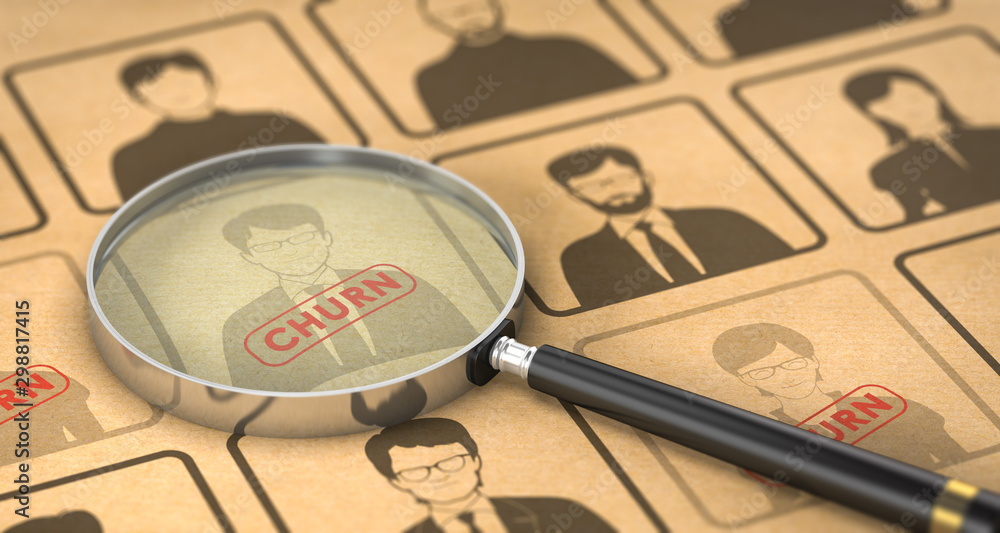

#**1. Introduction & motivation**

Customer Churn also known as customer attrition, or customer turnover is the loss of clients or customers. For telecommunications companies, customer churn is an ever-present challenge that can significantly impact their bottom line. Accurately identifying the key driving factors of customer churn allows them to be proactive in their retention efforts and maintain a stable subscriber base. By analyzing customer data, patterns may emerge that reveal certain demographic groups or service preferences more prone to churn. Armed with these insights, companies can tailor their retention strategies, such as targeted promotions or service improvements, to address the specific needs and pain points of at-risk customers.

Moreover, understanding the reasons behind churn can inform strategic decisions regarding product and service offerings. If a particular feature or plan is consistently cited as a factor in customers' decisions to switch providers, the company can reevaluate and enhance that aspect of its service to better meet customer expectations and remain competitive.

# **2. Project Objective**

The objective of this project centers on conducting a thorough analysis of existing customer churn within a telecom company to identify underlying patterns and determinants across various segments, including geographic locations, contract types, specific service preferences, between others. By identify these findings, we can suggest strategic actions to curtail churn effectively, thereby bolstering customer retention rates, optimizing service value, and company’s  profitability.


# **3. Excecutive Summary**

The churn analysis provides valuable insights into customer behavior, revealing key patterns and trends essential for strategic decision-making. Our findings reveal new customers, particularly within the first three months of service, are most likely to churn. We discovered that customers with subscriptions to tech support and online security services tend to have lower churn rates. Furthermore, our analysis highlighted the instability associated with month-to-month contracts, which have the highest churn rates, whereas customers with longer-term contracts demonstrate greater loyalty. Region-specific insights revealed that cities like Los Angeles and San Diego experience higher churn rates. These aspects underscore the need for strategic actions across service offerings, contract management, and localized marketing to enhance customer retention and satisfaction.

# **4. Exploratory Phase**


## **4.1 Dataset details**

The data was downloaded from IBM Telecommunications Industry Sample Data Sets: [IBM accelerator catalog](https://accelerator.ca.analytics.ibm.com/bi/?perspective=authoring&pathRef=.public_folders%2FIBM%2BAccelerator%2BCatalog%2FContent%2FDAT00148&id=i9710CF25EF75468D95FFFC7D57D45204&objRef=i9710CF25EF75468D95FFFC7D57D45204&action=run&format=HTML&cmPropStr=%7B%22id%22%3A%22i9710CF25EF75468D95FFFC7D57D45204%22%2C%22type%22%3A%22reportView%22%2C%22defaultName%22%3A%22DAT00148%22%2C%22permissions%22%3A%5B%22execute%22%2C%22read%22%2C%22traverse%22%5D%7D)


This sample data tracks a telco company's customer churn based on a variety of possible factors. Each row represents a customer, each column contains the customer's attributes. Below are the most relevant columns used in our analysis, which correspond to different datasets:

**The data set includes information about:**

**CustomerID:** Unique identifier for each customer.

**Gender:** Gender of the customer.

**Senior Citizen:** Indicates if the customer is a senior citizen.

**Partner:** Indicates if the customer has a partner.

**Dependents:** Indicates if there are dependents.

**City:** City where the customer resides.

**Tenure Months:** Number of months the customer has been with the company.

**Phone Service:** Indicates if the customer has phone service.

**Multiple Lines:** Indicates if the customer has multiple lines.

**Internet Service:** Type of internet service (DSL, Fiber optic, No).

**Online Security:** Online security service subscription, analyzed for service impact on churn.

**Online Backup:** Online backup service subscription.

**Device Protection:** Device protection plan.

**Tech Support:** Tech support service, crucial for understanding its effect on customer satisfaction and churn.

**Streaming TV:** Streaming TV service subscription, part of service preferences analysis.

**Streaming Movies:** Streaming movies service subscription, analyzed for customer entertainment options.

**Contract:** Type of customer contract (Month-to-month, One year, Two year).

**Paperless Billing:** Indicates if the customer uses paperless billing.

**Payment Method:** Method used by the customer for payment.

**Monthly Charges:** Monthly fee charged to the customer.

**Total Charges:** Total amount charged to the customer over time, analyzed to understand long-term customer value.

**Churn Label:** Indicates if the customer has churned.

**Churn Value:** Numeric representation of churn status.

**Churn Reason:** Specific reason why the customer churned.



**Preparing the Notebook**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


**Reading datasets**

In [ ]:
df = pd.read_excel('https://github.com/gungwah/is833/raw/main/Telco_customer_churn.xlsx')
demographics = pd.read_excel('https://github.com/gungwah/is833/raw/main/Telco_customer_churn_demographics.xlsx')
services = pd.read_excel('https://github.com/gungwah/is833/raw/main/Telco_customer_churn_services.xlsx')
population = pd.read_excel('https://github.com/gungwah/is833/raw/main/Telco_customer_churn_population.xlsx')
demographics.rename(columns={"Customer ID": "CustomerID"}, inplace=True) #we should change the column name (remove space) so we could join the dataframe
services.rename(columns={"Customer ID": "CustomerID"}, inplace=True)

**Data Inspection**

In [ ]:
df.info()
demographics.info()
services.info()
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

##**4.2 Cleaning the data**

**Dataset df:** According to the detail() report, to complete the missing information in the column “Churn Reason” the dataset doesn’t consider values because it contains information not just of customers who churn but also of current customers of the company. We complete the missing values: “There is no reason because the client didn’t churn.”

In addition, column "Total charges" have missing values, too; we can complete this information with the same amount of monthly charges, considering it is not possible for clients not to pay anything, and any payment shouldn’t be less than the total amount per month.

In [ ]:
df['Churn Reason'] = df['Churn Reason'].fillna("There is no reason because the client didn’t churn")
# Convert 'Total Charges' from object to float, coercing errors to NaN
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
# Fill NaN values in 'Total Charges' with corresponding 'Monthly Charges'
df['Total Charges'].fillna(df['Monthly Charges'], inplace=True)
# Display DataFrame info to confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

To ensure that there is no duplicate data, the duplicated() method returns a Boolean Series indicating whether each row is a duplicate of a previous row within the DataFrame. Applying sum() to this Boolean Series counts how many True values are present, which corresponds to the number of duplicate entries. The result is then printed.


In [ ]:
total_duplicates = df.duplicated().sum()
print(f"Total duplicate entries in the dataset: {total_duplicates}")

customer_id_duplicates = df.duplicated(subset=['CustomerID']).sum()
print(f"Duplicate entries based on CustomerID: {customer_id_duplicates}")

Total duplicate entries in the dataset: 0
Duplicate entries based on CustomerID: 0


In [ ]:
total_duplicates = demographics.duplicated().sum()
print(f"Total duplicate entries in the dataset: {total_duplicates}")

customer_id_duplicates = demographics.duplicated(subset=['CustomerID']).sum()
print(f"Duplicate entries based on CustomerID: {customer_id_duplicates}")

Total duplicate entries in the dataset: 0
Duplicate entries based on CustomerID: 0


In [ ]:
total_duplicates = services.duplicated().sum()
print(f"Total duplicate entries in the dataset: {total_duplicates}")

customer_id_duplicates = services.duplicated(subset=['CustomerID']).sum()
print(f"Duplicate entries based on CustomerID: {customer_id_duplicates}")

Total duplicate entries in the dataset: 0
Duplicate entries based on CustomerID: 0


##**4.3 Merging process**

First, the churn data will be merged with the demographics

In [ ]:
churn_demographics = pd.merge(df, demographics, how="inner", on='CustomerID') # joining churn dataset and demographics dataset with CustomerID as the Key

#since there are so many column (44) and there are duplicated columns as well, its make it hard to analyse we should reduced the column and keep what we need
churn_demographics.drop(columns=['Lat Long','Latitude', 'Longitude','Paperless Billing','Payment Method','Count_y','Gender_y','Senior Citizen_y','Dependents_y','Churn Score'], inplace=True)

#churn_demographics['Number of Dependents'].unique()
churn_demographics.rename(columns={"Count_x": "Count","Gender_x": "Gender","Senior Citizen_x": "Senior Citizen","Senior Citizen_x": "Senior Citizen", 'Dependents_x':'Dependents'}, inplace=True)
churn_demographics.info
churn_demographics.head(2)

,CustomerID,Count,Country,State,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,...,Monthly Charges,Total Charges,Churn Label,Churn Value,CLTV,Churn Reason,Age,Under 30,Married,Number of Dependents
0,3668-QPYBK,1,United States,California,Los Angeles,90003,Male,No,No,No,...,53.85,108.15,Yes,1,3239,Competitor made better offer,37,No,No,0
1,9237-HQITU,1,United States,California,Los Angeles,90005,Female,No,No,Yes,...,70.70,151.65,Yes,1,2701,Moved,19,Yes,No,2


Second, the churn data will be merged with the Services

In [ ]:
#joining churn and services dataframe
services_cols = services.columns.difference(df.columns).tolist() # find the column diffrence between 2 dataset and only join column where are not duplicate so we doesnt need to remove duplicate column manualy
services_cols.append('CustomerID') #append the CustomerID since we need this to join the dataframe
services_cols

churn_services = pd.merge(df, services[services_cols], how="inner", on='CustomerID') # joining churn dataset and services dataset with CustomerID as the Key
churn_services.info()
churn_services.head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CustomerID                         7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Country                            7043 non-null   object 
 3   State                              7043 non-null   object 
 4   City                               7043 non-null   object 
 5   Zip Code                           7043 non-null   int64  
 6   Lat Long                           7043 non-null   object 
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Gender                             7043 non-null   object 
 10  Senior Citizen                     7043 non-null   object 
 11  Partner                            7043 non-null   objec

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Quarter,Referred a Friend,Service ID,Streaming Music,Tenure in Months,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Unlimited Data
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Q3,No,ZLZTZWPWE3351,No,2,0,20.94,0.0,129.09,Yes
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Q3,No,GXJVSQIYH4715,No,2,0,18.24,0.0,169.89,Yes


Lastly, the churn data will be merged with the population

In [ ]:
churn_population = pd.merge(df, population, how="inner", on='Zip Code') # joining churn dataset and demographics dataset with CustomerID as the Key

churn_population.info()
churn_population.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,ID,Population
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,3,58198
1,2967-MXRAV,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Mailed check,18.80,18.80,No,0,51,5160,There is no reason because the client didn’t c...,3,58198


# **5. Churn Analysis**

## **5.1 Questions about the data**



*   What is the churn rate for each gender group?
    
    **Answer:**  The rate between genders is not too different

*   Which city has the highest number of churn?
  
    **Answer:** The city with the highest number of churns is Los Angeles (26.01%).

    Notice that San Diego and San Francisco also show high churn, 14.45%, and 8.96%, respectively.   

*   What are the primary reasons contributing to customer churn?
  
    **Answer:** Top 5 key drivers of customer churn are

    -Attitude of support person

    -Competitors offered higher download speeds

    -Competitor offered more data

    -Don't know
    
    -Competitor made better offer

*   Is there another factor influencing customers churn?
  
    **Answer:** Among many other reasons, we can find that customers with no tech support shows a big proportion (41.64%) of customers who churned. This suggests that not having tech support might be a fundamental drive to the decision to leave the company.

*   Do the clients that churn pay on average more than those who do not?
  
    **Answer:** For the top 10 cities where the company operates, customers who churned appear to have a higher average monthly charge than those who did not churn.

*   How is Demographics distributed, and what is the churn rate for each Demographics group?
     
     **Answer:** according to data there are 5 categories of demographics: under 30, Married, Senior Citizen, Dependents and Partner, three of the most demographics who churned are Married(35.79%), Partner(35.79%), Senior Citizen Group(25.47%) and the lowest are under 30(16.27%) and dependents (5.67%)

*   How is the comparison between customers in each city in regards to the respective city population?

  **Answer:** larger population distribution doesn't always mean a higher customer percentage. For example, Sacramento (10.6%) has a larger population than San Francisco (10.2%), but on the other hand San Francisco has more customers (8.6%) compared to Sacramento (7.6%). This also applies to Bakersfield-Oakland and Fresno-Long Beach.

*   How are the types of services customers have distributed, and what is the churn rate percentage for each service? Which customer service is most likely to cause a churn?

 **Answer:** there are few services that are mostly causing customer not to churn for example device protection plan (70.8% not churn), Premium tech support (83.4% not churn), Streaming music (61% not churn), tech support(77.4% not churn), on the other hand streaming movies and tv have equal distribution of churn meanwhile customer who enrolled in unlimited data mostly(80.4%) are churning

*   How does the type of customer contract relate to churn rates?
    
    The churn rate varies significantly by contract type: month-to-month contracts see the highest churn rate, 42.71%; one-year and two-year contracts have a much lower churn rate, 11.27% and 2.83%, respectively.

*   Among the various service and customer attributes analyzed, which variables exhibit the highest correlation with customer churnt?

    **Answer:** tenure and contract type have notable correlations with churn; longer tenure is negatively correlated, indicating it reduces churn likelihood. Month-to-month contracts are positively correlated with churn, suggesting customers with this contract type are more likely to leave. Internet service type, particularly fiber optic, and payment method, especially electronic checks, also shows a strong positive correlation with churn.

*   What is the critical tenure or time period during which customers are most likely to churn?

    **Answer:** A steep drop in the number of customers staying with the service in the initial months, indicating a high churn rate early on. As time passes, the drop in retention becomes less pronounced, suggesting that customers who remain for a longer period are less likely to cancel their service.
    
    Note that Customers within their first three months with the service, are most likely to leave.

*   Which model, logistic regression or XGBoost, performs better in predicting customer churn?

    **Answer:** XGBoost outperforms logistic regression in predicting customer churn. It has a higher accuracy (0.80 vs. 0.79), and a superior ROC AUC Score (0.86 vs. 0.84), indicating better overall model performance. The precision of XGBoost is also greater at 0.65 compared to 0.63 for logistic regression.

## **5.2 Overview of Churn Data**

**Customer Churn by Gender**

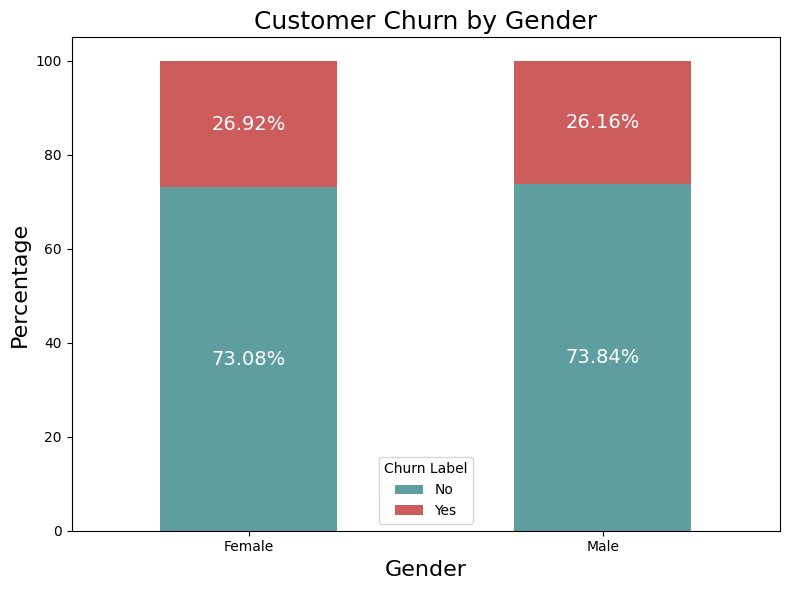

In [ ]:
# Group data by Gender and Churn Label, count occurrences
gender_churn_counts = df.groupby(['Gender', 'Churn Label']).size().unstack(fill_value=0)

# Calculate percentages for each portion
totals = gender_churn_counts.sum(axis=1)
gender_churn_percentages = gender_churn_counts.divide(totals, axis=0) * 100

# Ensure percentages do not exceed 100%
gender_churn_percentages = gender_churn_percentages.clip(upper=100)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Stacked bar chart
bars = gender_churn_percentages.plot(kind='bar', stacked=True, ax=ax, color=['#5f9ea0', '#cd5c5c'])

# Adding percentages on the bars
for bar in bars.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=14, color='white')

# Adding labels and title
plt.title('Customer Churn by Gender', fontsize=18)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(rotation=0)
plt.legend(title='Churn Label')

# Show plot
plt.tight_layout()
plt.show()

The 'Customer Churn by Gender' graph represents the churn rate proportion between genders, and as per the charts, the rate between genders is not too different, indicating that gender is not a significant factor in determining churn rate.

**Percentage of churn in each city within the state of California**

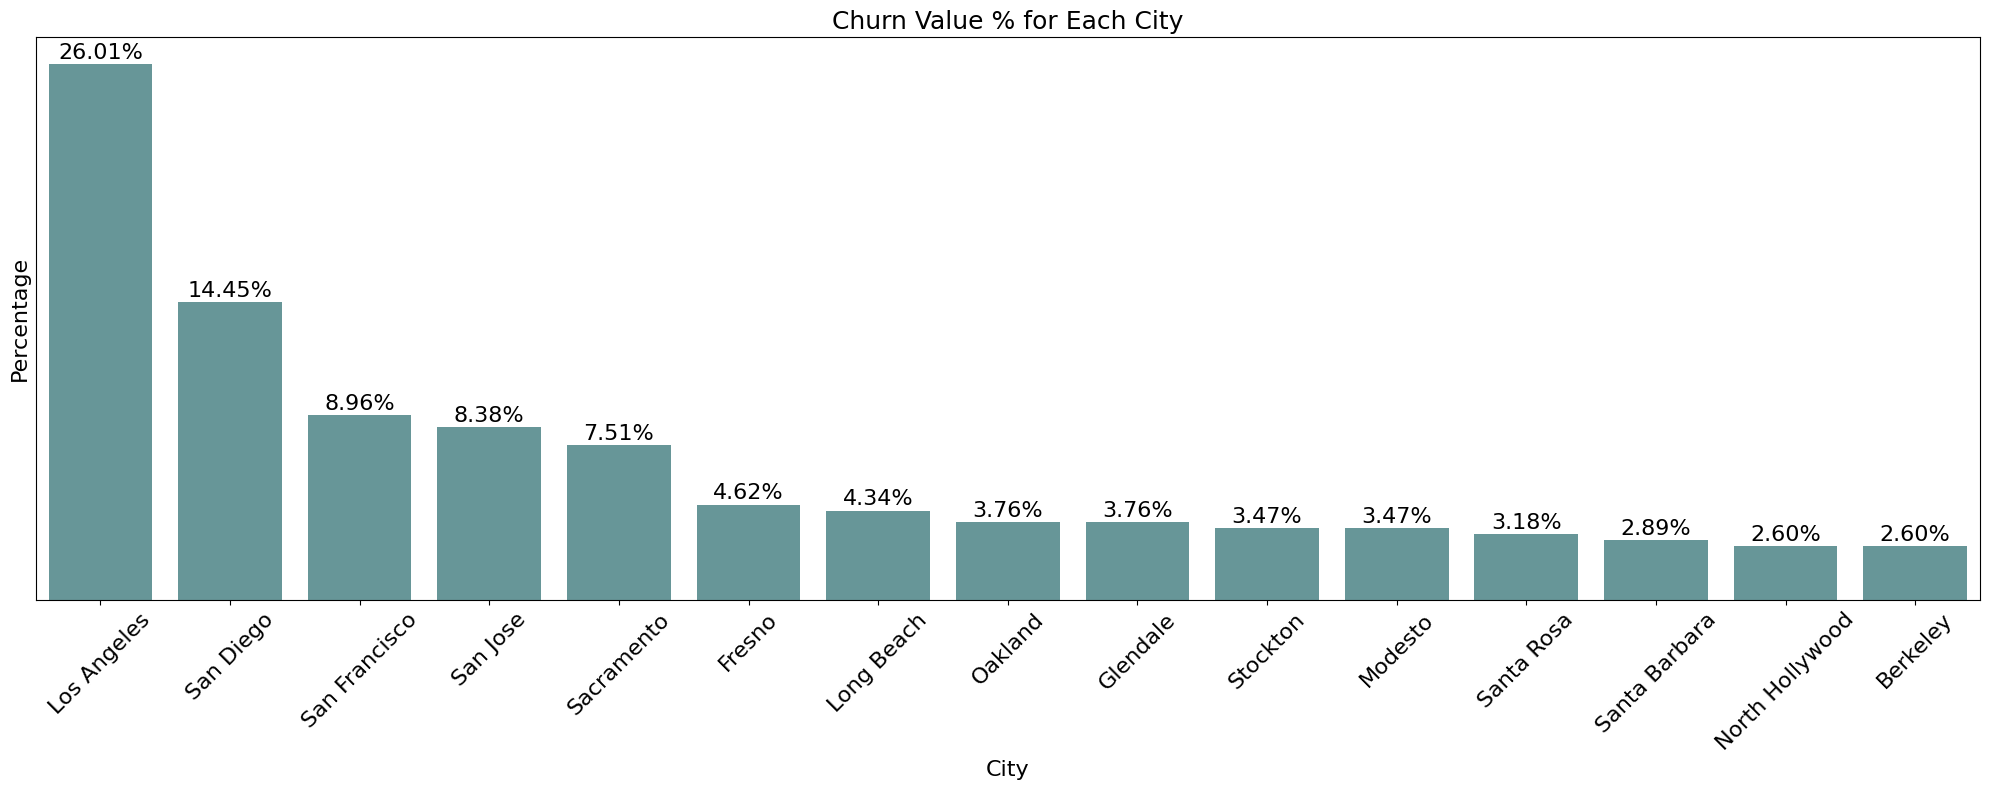

In [ ]:
city_churn_counts = df[df['Churn Label'] == 'Yes'].groupby('City').size().reset_index(name='Churn Count')
sorted_cities = city_churn_counts.sort_values(by='Churn Count', ascending=False)
top_cities = sorted_cities.head(15)
total_churns = top_cities['Churn Count'].sum()

plt.figure(figsize=(20, 8))
sns.despine(left=True, bottom=True)
sns.barplot(x=top_cities['City'], y=top_cities['Churn Count'], data=top_cities, color='#5f9ea0')

# Increase font size for x-axis labels (City)
plt.xticks(rotation=45, fontsize=16)

plt.title('Churn Value % for Each City', fontsize=18)
plt.xlabel('City', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.yticks([])
# Add percentage related to the total count on top of each bar
for index, value in enumerate(top_cities['Churn Count']):
    percentage = (value / total_churns) * 100
    plt.text(index, value + 0.2, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=16)

plt.tight_layout()
plt.show()


The 'Churn Value Counts for Each City' graph shows the percentage of churn in each city within the state of California.

**Distribution of Churn Reasons**

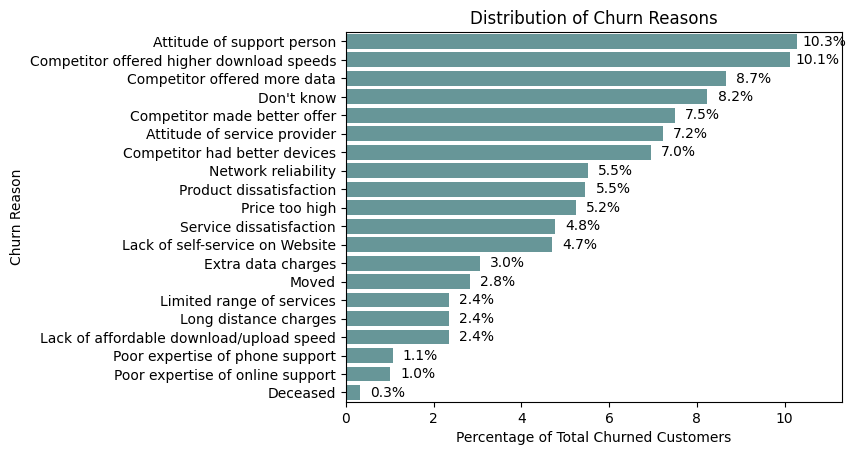

In [ ]:
# Filter out the customers who have not churned (Churn Value = 0)
churned_customers = df[df['Churn Value'] == 1]

# Calculate the frequencies of each churn reason as a percentage of the total number of customers who have churned.
churn_reason_counts = churned_customers['Churn Reason'].value_counts(normalize=True) * 100

# Plot the churn reasons on a bar chart
#plt.figure(figsize=(10, 8))
ax = sns.barplot(x=churn_reason_counts, y=churn_reason_counts.index, color='#5f9ea0')

# Annotate percentages on the bars
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.1f') + '%', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(20, 0), textcoords='offset points')

# Set the x-axis to represent percentages from 0 to a bit above the highest percentage for spacing
ax.set_xlim(0, max(churn_reason_counts) * 1.1)  # Multiply by 1.1 to add 10% spacing
ax.set_xlabel("Percentage of Total Churned Customers")
ax.set_ylabel("Churn Reason")
ax.set_title("Distribution of Churn Reasons")

plt.show()

The 'Key Drivers of Customer Churn' graph represents reasons why customer churns happen. 'Attitude of support person' is the top reason followed by 'Higher download speed by competitor' for higher number of churns.

**Analysis of Churn Rate Based on Tech Support**

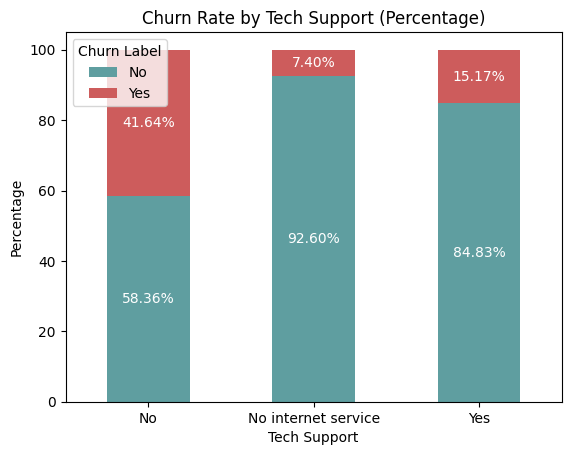

In [ ]:
tech_support_churn = churn_services.groupby('Tech Support')['Churn Label'].value_counts(normalize=True).unstack() * 100
ax = tech_support_churn.plot(kind='bar', stacked=True, color=['#5f9ea0', '#cd5c5c'])

plt.title('Churn Rate by Tech Support (Percentage)')
plt.xlabel('Tech Support')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# Adding percentage labels to each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

plt.show()


Following the analysis on drivers for our customers to churn, we can find that customers with no tech support shows a big proportion (41.64%) of customers who did not have tech support churned. This suggests that not having tech support might be a fundamental drive to the decision to leave the company. While on the other side, customers with Tech support show a lower churn rate (15.17%). This suggests that having access to tech support can positively affect customer retention. Lastly, those customers with no internet service show a very low churn rate (7.40%). This might suggest that customers who use only voice services are less likely to churn, which could reflect less issues involving tech support.

## **5.3 Churn by Demographics**

**Percentage Analysis of Churned Customers by Key Demographics**

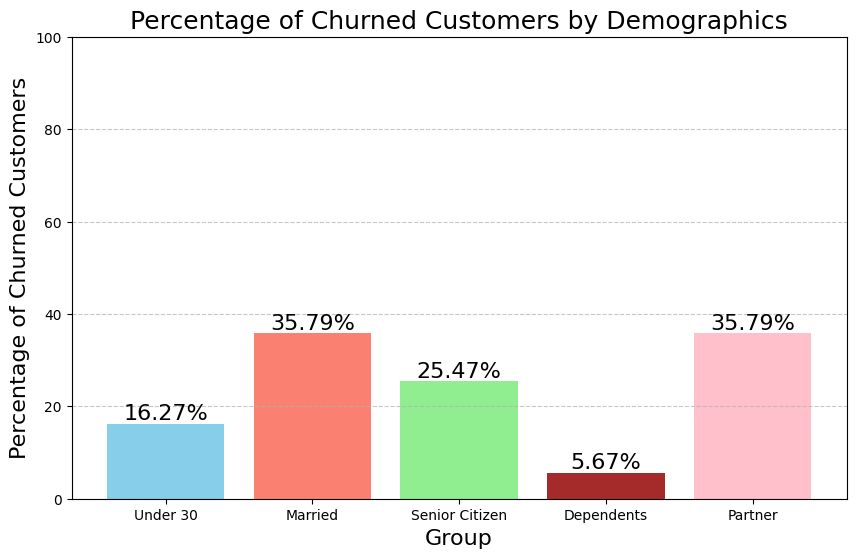

In [ ]:
churned_customers = churn_demographics[churn_demographics['Churn Value'] == 1]

# Step 2: Calculate the percentage of churned customers within each group
percentages = {}
for column in ['Under 30', 'Married', 'Senior Citizen', 'Dependents', 'Partner']:
    percentages[column] = (churned_customers[column].value_counts(normalize=True) * 100).get('Yes', 0)

colors = ['skyblue', 'salmon', 'lightgreen', 'brown', 'pink']

plt.figure(figsize=(10, 6))
bars = plt.bar(percentages.keys(), percentages.values(), color=colors)

# Add percentage values on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=16)

plt.title('Percentage of Churned Customers by Demographics', fontsize=18)
plt.xlabel('Group', fontsize=16)
plt.ylabel('Percentage of Churned Customers', fontsize=16)
plt.ylim(0, 100)  # Ensure y-axis starts from 0 and ends at 100
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove axis lines
#plt.axis('off')

plt.show()


This chart shows the churn rate of each of the 5 demographic categories. The top 3 categories with the most churn percentage are married (35.6%), senior citizens (25.5%), and partners (35.6%), and the two lowest are dependents (5.7%) and under 30 (16.27%).

**Customer and Population Distributions in Top 10 Most Populous Cities**

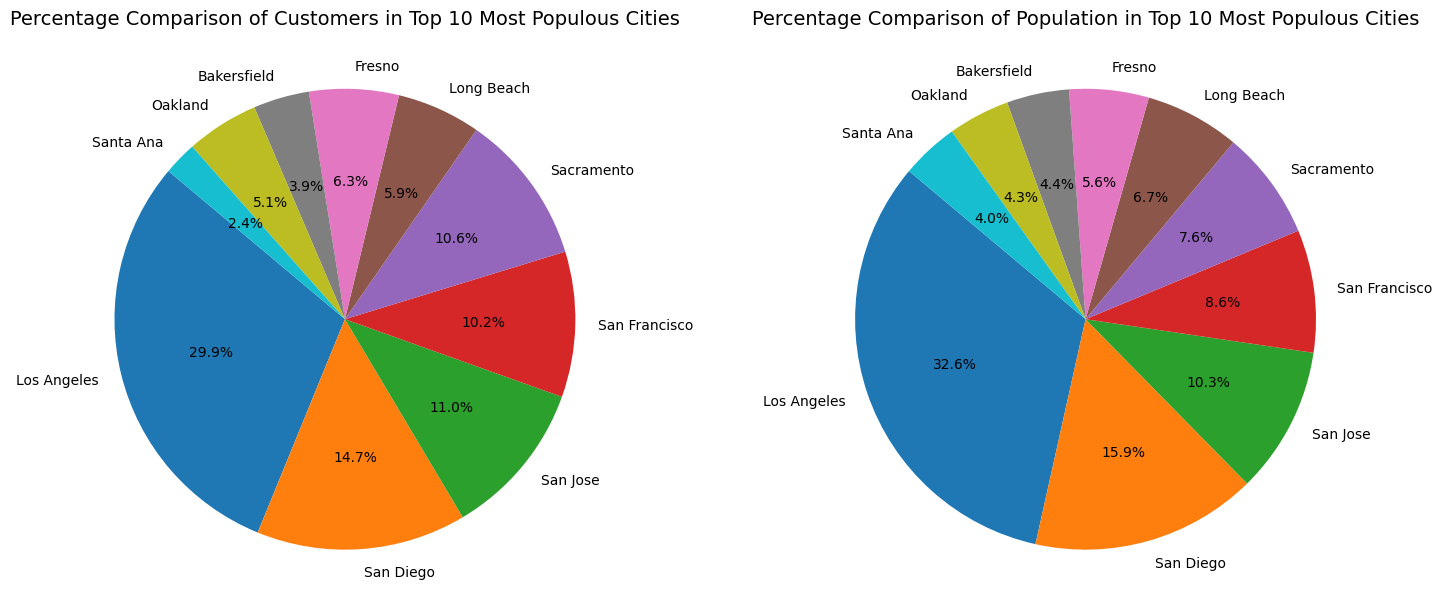

In [ ]:
city_population = churn_population.groupby('City')['Population'].sum().reset_index()

# Sort the cities by population in descending order and select the top 10 most populous cities
top_10_cities = city_population.sort_values(by='Population', ascending=False).head(10)

# Merge the top 10 cities with the original dataframe to get customer counts for those cities
top_10_data = pd.merge(top_10_cities, df.groupby('City')['CustomerID'].count().reset_index(), on='City')

# Calculate the percentage of customers and population for each city
top_10_data['Customer Percentage'] = (top_10_data['CustomerID'] / top_10_data['CustomerID'].sum()) * 100
top_10_data['Population Percentage'] = (top_10_data['Population'] / top_10_data['Population'].sum()) * 100

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot the pie chart for customer percentage
axs[0].pie(top_10_data['Customer Percentage'], labels=top_10_data['City'], autopct='%1.1f%%', startangle=140)
axs[0].set_title('Percentage Comparison of Customers in Top 10 Most Populous Cities', pad=30, fontsize=14)
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot the pie chart for population percentage
axs[1].pie(top_10_data['Population Percentage'], labels=top_10_data['City'], autopct='%1.1f%%', startangle=140)
axs[1].set_title('Percentage Comparison of Population in Top 10 Most Populous Cities', pad=30, fontsize=14)
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Increase label fontsize to 14
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()


These two pie charts represent the population percentage of the 10 biggest cities in California with respect to the percentage of customers from each respective city. From both pie charts, we can see that a larger population distribution doesn't always mean a higher customer percentage. For example, Sacramento (10.6%) has a larger population than San Francisco (10.2%), but on the other hand San Francisco has more customers (8.6%) compared to Sacramento (7.6%). This also applies to Bakersfield-Oakland and Fresno-Long Beach.

## **5.4 Churn by Service and Contract Type**

**Analysis of Churn by Service Subscription Options**

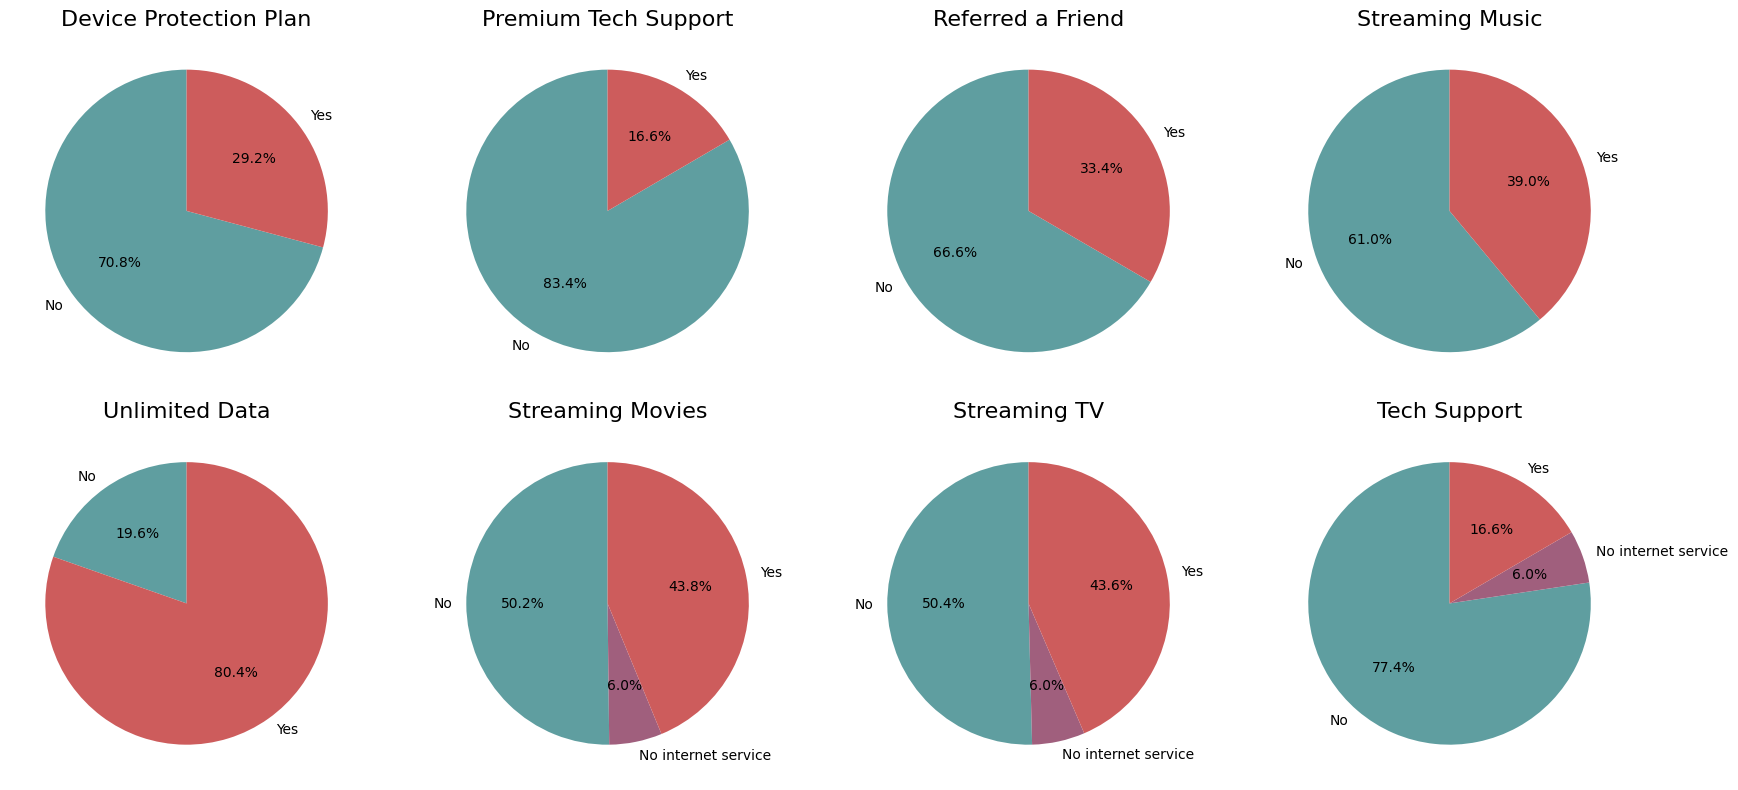

In [ ]:
filtered_cols = []
for col in services_cols:
    if set(churn_services[col].unique()) == {'Yes', 'No'}:
        filtered_cols.append(col)

#filtered_cols contains the columns with "Yes" or "No" values
#filtered_cols #['Device Protection Plan', 'Premium Tech Support', 'Referred a Friend', 'Streaming Music', 'Unlimited Data']

filtered_cols.extend(['Streaming Movies', 'Streaming TV','Tech Support'])# Append columns to filtered_cols that has value other than yes/no
num_plots = len(filtered_cols)
# Create a figure with subplots for each column
fig, axs = plt.subplots(2, 4, figsize=(18, 8))
axs = axs.flatten()

# Define a color palette for the pie charts
color_palettes = [
    {'Yes': '#cd5c5c', 'No': '#5f9ea0'},  # Color palette for the first pie chart
    {'Yes': '#cd5c5c', 'No': '#5f9ea0'}, # Color palette for the second pie chart
    {'Yes': '#cd5c5c', 'No': '#5f9ea0'}, # Color palette for the third pie chart
    {'Yes': '#cd5c5c', 'No': '#5f9ea0'},  # Color palette for the fourth pie chart
    {'Yes': '#cd5c5c', 'No': '#5f9ea0'},  # Color palette for the fifth pie chart
    {'Yes': '#cd5c5c', 'No': '#5f9ea0', 'No internet service': '#a05f7d'},   # Color palette for the sixth pie chart
    {'Yes': '#cd5c5c', 'No': '#5f9ea0', 'No internet service': '#a05f7d'},   # Color palette for the sixth pie chart
    {'Yes': '#cd5c5c', 'No': '#5f9ea0', 'No internet service': '#a05f7d'}   # Color palette for the seventh pie chart
]

# Iterate over each column and plot the pie chart
for i, (column, color_palette) in enumerate(zip(filtered_cols, color_palettes)):
    churn_counts = churn_services.groupby(column)['Churn Value'].sum()
    churn_counts.plot(kind='pie', ax=axs[i], autopct='%1.1f%%', startangle=90, colors=[color_palette[val] for val in churn_counts.index])
    axs[i].set_ylabel('')  # Remove y-label
    axs[i].set_title(column)
    axs[i].set_title(column, fontsize=16)  # Set title fontsize to 14
    axs[i].tick_params(axis='both', labelsize=16)  # Set label fontsize to 14
# Hide empty subplots
for j in range(num_plots, len(axs)):
    axs[j].axis('off')

plt.tight_layout()

plt.show()

These 8 pie chart represent churn percentage for each 7 services and one chart about how refering a friend corespond to churn rate. Device protection plan, Premium tech support and Tech support influence the customer to not churned the most, streaming movies and TV both equaly share similiar churn distribution, however most of the customer who are churned enrolled in the unlimited data service

**Analysis of Customer Churn and Charges by Contract Type**

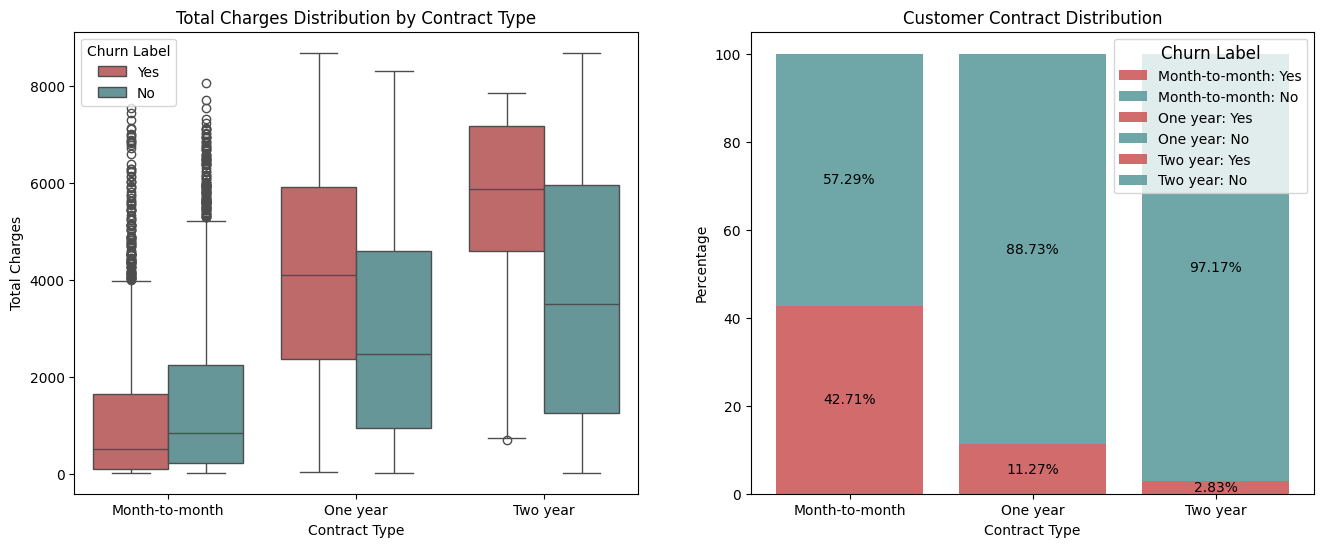

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Define the order of contracts
contract_order = ['Month-to-month', 'One year', 'Two year']

# Sort the DataFrame by the order of contracts
churn_demographics_sorted = churn_demographics.copy()
churn_demographics_sorted['Contract'] = pd.Categorical(churn_demographics_sorted['Contract'], categories=contract_order, ordered=True)
churn_demographics_sorted = churn_demographics_sorted.sort_values(by='Contract')

# Create the boxplot with sorted data
plt.figure(figsize=(10, 6))
sns.boxplot(data=churn_demographics_sorted, x='Contract', y='Total Charges', hue='Churn Label',ax=axes[0], palette={'Yes': '#cd5c5c', 'No': '#5f9ea0'})

# Boxplot for Total Charges by Contract Type
axes[0].set_title('Total Charges Distribution by Contract Type')
axes[0].set_xlabel('Contract Type')
axes[0].set_ylabel('Total Charges')
axes[0].legend(title='Churn Label')

# Churn Rate by Contract Type
churn_labels = df['Churn Label']
contracts = df['Contract'].unique()
contracts = [contracts[0], contracts[2], contracts[1]]  # Re-arrange the contract order

# Iterate through each contract type
for i, contract in enumerate(contracts):
    data = churn_labels[df['Contract'] == contract]
    counts = data.value_counts(normalize=True) * 100  # Calculate percentages directly

    # Plotting bar chart
    axes[1].bar(i, counts.get('Yes', 0), alpha=0.9, label=f'{contract}: Yes', color='#cd5c5c')
    axes[1].bar(i, counts.get('No', 0), alpha=0.9, bottom=counts.get('Yes', 0), label=f'{contract}: No', color='#5f9ea0')

    # Annotate percentages on the plot
    axes[1].text(i, counts.get('Yes', 0) / 2, f"{counts.get('Yes', 0):.2f}%", ha='center', va='center', color='black', fontsize=10)
    axes[1].text(i, counts.get('Yes', 0) + counts.get('No', 0) / 2, f"{counts.get('No', 0):.2f}%", ha='center', va='center', color='black', fontsize=10)

# Adding title and labels for the second subplot
axes[1].set_title('Customer Contract Distribution')
axes[1].set_xlabel('Contract Type')
axes[1].set_ylabel('Percentage')

# Adding legend and adjusting its properties
axes[1].legend(title='Churn Label', fontsize=10, title_fontsize='12', loc='upper right')

# Set x-axis ticks and labels for the second subplot
axes[1].set_xticks(range(len(contracts)))
axes[1].set_xticklabels(contracts)

# Show plot
plt.tight_layout()
plt.show()


The **'Total Charge distribution by contract type'** Utilized a box plot to visualize the distribution of total charges for different contract types.
Contract Types: Analyzed the distribution across various contract types such as month-to-month, one-year, and two-year contracts.
Churn Label Differentiation: Differentiated the box plot by churn label, allowing for comparison of total charges distribution between churned and non-churned customers within each contract type.
Observations:
Total charges distribution varies significantly across different contract types.
Churned customers tend to have higher total charges across all contract types compared to non-churned customers.
Month-to-month contract customers exhibit wider total charges distribution, potentially indicating varying service usage patterns.
Implications: Understanding the relationship between contract types and total charges provides insights into customer behavior and preferences. It highlights potential areas for targeted marketing strategies or service offerings tailored to different contract types to improve customer retention and satisfaction.


The **'Customer Contract Distribution'** graph shows the proportion rate of customers based on their contract type. We can see that customers with a two-year contract type have the lowest churn rate, while customers with a monthly contract type have the highest. Therefore, contract type is a significant factor in affecting the churn rate.

## **5.5 Monthly Charges and Churn**

**Churn rate analysis for different monthly charges**

<Figure size 1000x600 with 0 Axes>

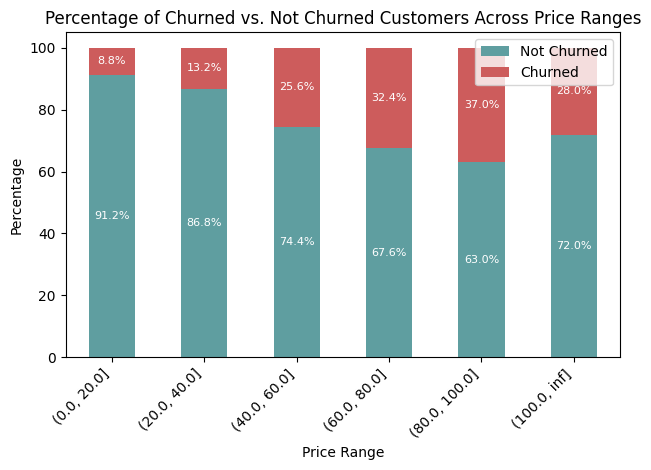

In [ ]:
# Replace non-numeric values (such as empty strings) in 'Monthly Charges' and 'Total Charges' columns with NaN
#df['Monthly Charges'] = pd.to_numeric(df['Monthly Charges'], errors='coerce')
#df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
# This is already in the cleaning process

# Filter out rows with NaN values in 'Monthly Charges' and 'Total Charges' columns
df_filtered = df.dropna(subset=['Monthly Charges'])

# Define price ranges and categorize 'Monthly Charges'
price_ranges = [(0, 20), (20, 40), (40, 60), (60, 80), (80, 100), (100, 120)]  # Define your price ranges here
df_filtered['Price Range'] = pd.cut(df_filtered['Monthly Charges'], bins=[x[0] for x in price_ranges] + [float('inf')])

# Group data by 'Price Range' and 'Churn Label', calculate counts and percentages
price_churn_counts = df_filtered.groupby(['Price Range', 'Churn Label']).size().unstack(fill_value=0)
price_churn_percentages = price_churn_counts.div(price_churn_counts.sum(axis=1), axis=0) * 100

# Plotting percentage of churned vs. not churned customers within price ranges with data labels
plt.figure(figsize=(10, 6))
bars = price_churn_percentages.plot(kind='bar', stacked=True, color=['#5f9ea0', '#cd5c5c'])

# Adding data labels (%)
for bar in bars.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy()
    label = f'{height:.1f}%' if height > 0 else ''
    plt.annotate(label, (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8, color='white')

plt.title('Percentage of Churned vs. Not Churned Customers Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.legend(['Not Churned', 'Churned'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()



This plot represents the percentage of customers who churned versus those who did not churn, categorized within different price ranges for monthly charges. By categorizing customers based on monthly charges and visualizing churn rates, we can identify patterns and trends regarding how pricing impacts customer retention. We can find out from the charts customer churn rate increases as the monthly charges increases till 100 per month. The customer who paid between 80 to 100 per month, the churn rate for them was 37.0%, compated to 8.8% of customers between 0 to 20 and 13.2% for charges between 20 to 40.



**Comparison of Average Monthly Charges by Churn Status in Top 10 Cities**

<Figure size 1200x800 with 0 Axes>

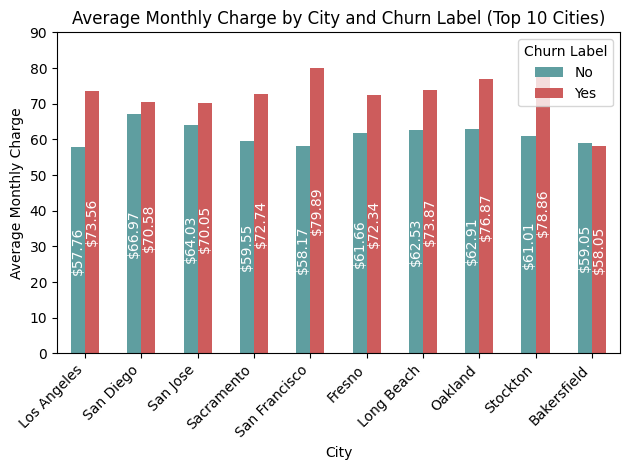

In [ ]:
# Group by 'City' and 'Churn Label', and calculate the average 'Monthly Charge'
avg_monthly_charge = churn_services.groupby(['City', 'Churn Label'])['Monthly Charges'].mean().unstack()

# Select the top 10 cities with the most client count
top_10_cities = churn_services['City'].value_counts().nlargest(10).index

# Filter the average monthly charge for the top 10 cities
avg_monthly_charge_top_10 = avg_monthly_charge.loc[top_10_cities]

# Define colors for each Churn Label
colors = {'Yes': '#cd5c5c', 'No': '#5f9ea0'}  # You can adjust the colors as needed

# Plot the graph
plt.figure(figsize=(12, 8))
ax = avg_monthly_charge_top_10.plot(kind='bar', color=[colors[label] for label in avg_monthly_charge_top_10.columns])

plt.title('Average Monthly Charge by City and Churn Label (Top 10 Cities)')
plt.xlabel('City')
plt.ylabel('Average Monthly Charge')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn Label')

# Add labels to each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'${"{:.2f}".format(height)}', (x + width / 2, y + height / 2), ha='center', va='center', color='white', rotation=90)

# Set the maximum limit for y-axis
plt.ylim(0, 90)

plt.tight_layout()
plt.show()


For almost all cities listed, customers who churned appear to have a higher average monthly charge than those who did not churn. This confirms one of the drivers’ reasons we saw before, that one of the reasons why a customer churns is because they believe they are not getting as much value as they could for the money they are paying. We can conclude that higher charges may be a factor influencing the decision to churn, but what is certain is that customers that churn are paying more on average than those who don’t.

**Total Charges Distribution by Churn**

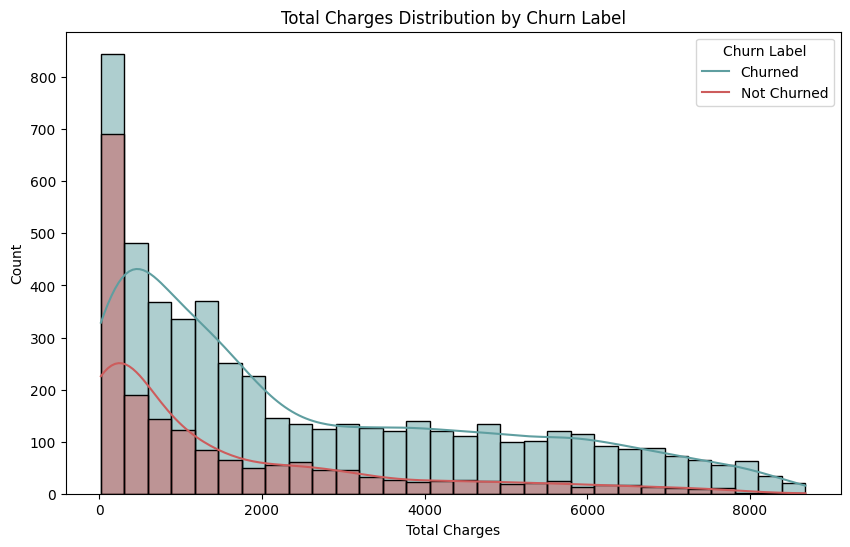

In [ ]:
# Total Charges Distribution by Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=churn_demographics, x='Total Charges', hue='Churn Label', kde=True, bins=30,
             palette={'Yes': '#cd5c5c', 'No': '#5f9ea0'})
plt.title('Total Charges Distribution by Churn Label')
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.legend(title='Churn Label', labels=['Churned', 'Not Churned'])
plt.show()


A histogram with KDE (Kernel Density Estimate) was used to visualize the distribution of total charges among customers.
Churn Label Differentiation: The histogram was differentiated by churn label, with churned customers represented in red and non-churned customers represented in blue.
The distribution of total charges varies for churned and non-churned customers.
Churned customers appear to have a slightly different distribution pattern compared to non-churned customers.
There is a concentration of churned customers at certain total charge levels, suggesting potential patterns or thresholds related to churn behavior.
Understanding the distribution of total charges for churned and non-churned customers can provide insights into factors influencing customer churn. It could help in identifying pricing strategies, service offerings, or customer segments that are more prone to churn, leading to targeted retention efforts.

**Probability distribution of churn against charges and tenure**

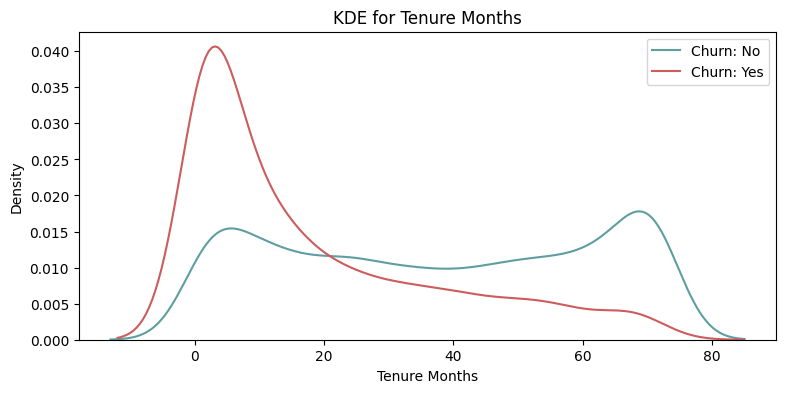

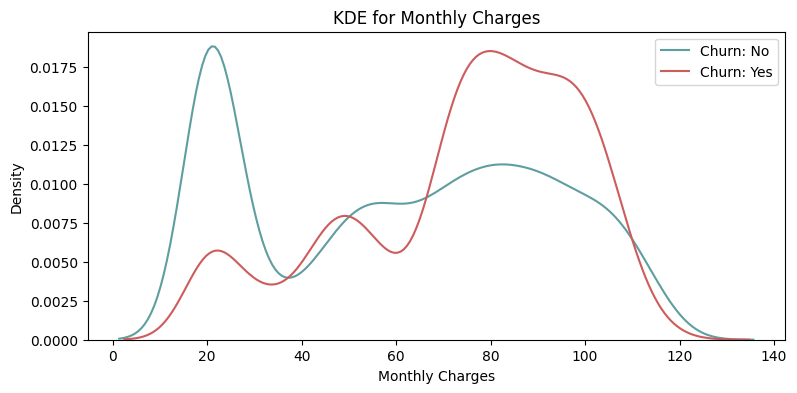

In [ ]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn Label'] == 'No'][feature].dropna(), color='#5f9ea0', label='Churn: No')
    ax1 = sns.kdeplot(df[df['Churn Label'] == 'Yes'][feature].dropna(), color='#cd5c5c', label='Churn: Yes')
    plt.xlabel(feature)  # Add x-axis label with the feature name
    plt.ylabel('Density')  # Add y-axis label for density
    plt.legend()  # Show legend for 'Churn: No' and 'Churn: Yes'
    plt.show()

# Function calls with corrected feature names
kdeplot('Tenure Months')
kdeplot('Monthly Charges')



The chart illustrates the probability distribution of churn rates relative to varying levels of charges and tenure, showcasing how customer attrition likelihood changes across different price points and duration of service. This analysis helps in discerning potential patterns or trends in customer churn concerning their charges and tenure, aiding businesses in developing targeted strategies to enhance customer retention and satisfaction. We can see there is a correlation between the probabibility of customer churn and tenure. Customers who has been with the telco for more than 20 months has significantly less probability of churn. We also see the probabibility of churn increases till monthly charges of 80. The probability decreases slighlty for monthly charges till 100.

##5.6 Additional Key Drivers

**Correlation Heatmap for Churn Analysis**

The correlation heatmap offers a visual summary of the relationships among variables.

It is important to notice that categorical variables like 'Gender' and 'Payment Method' have been transformed into numerical form by creating dummy variables.

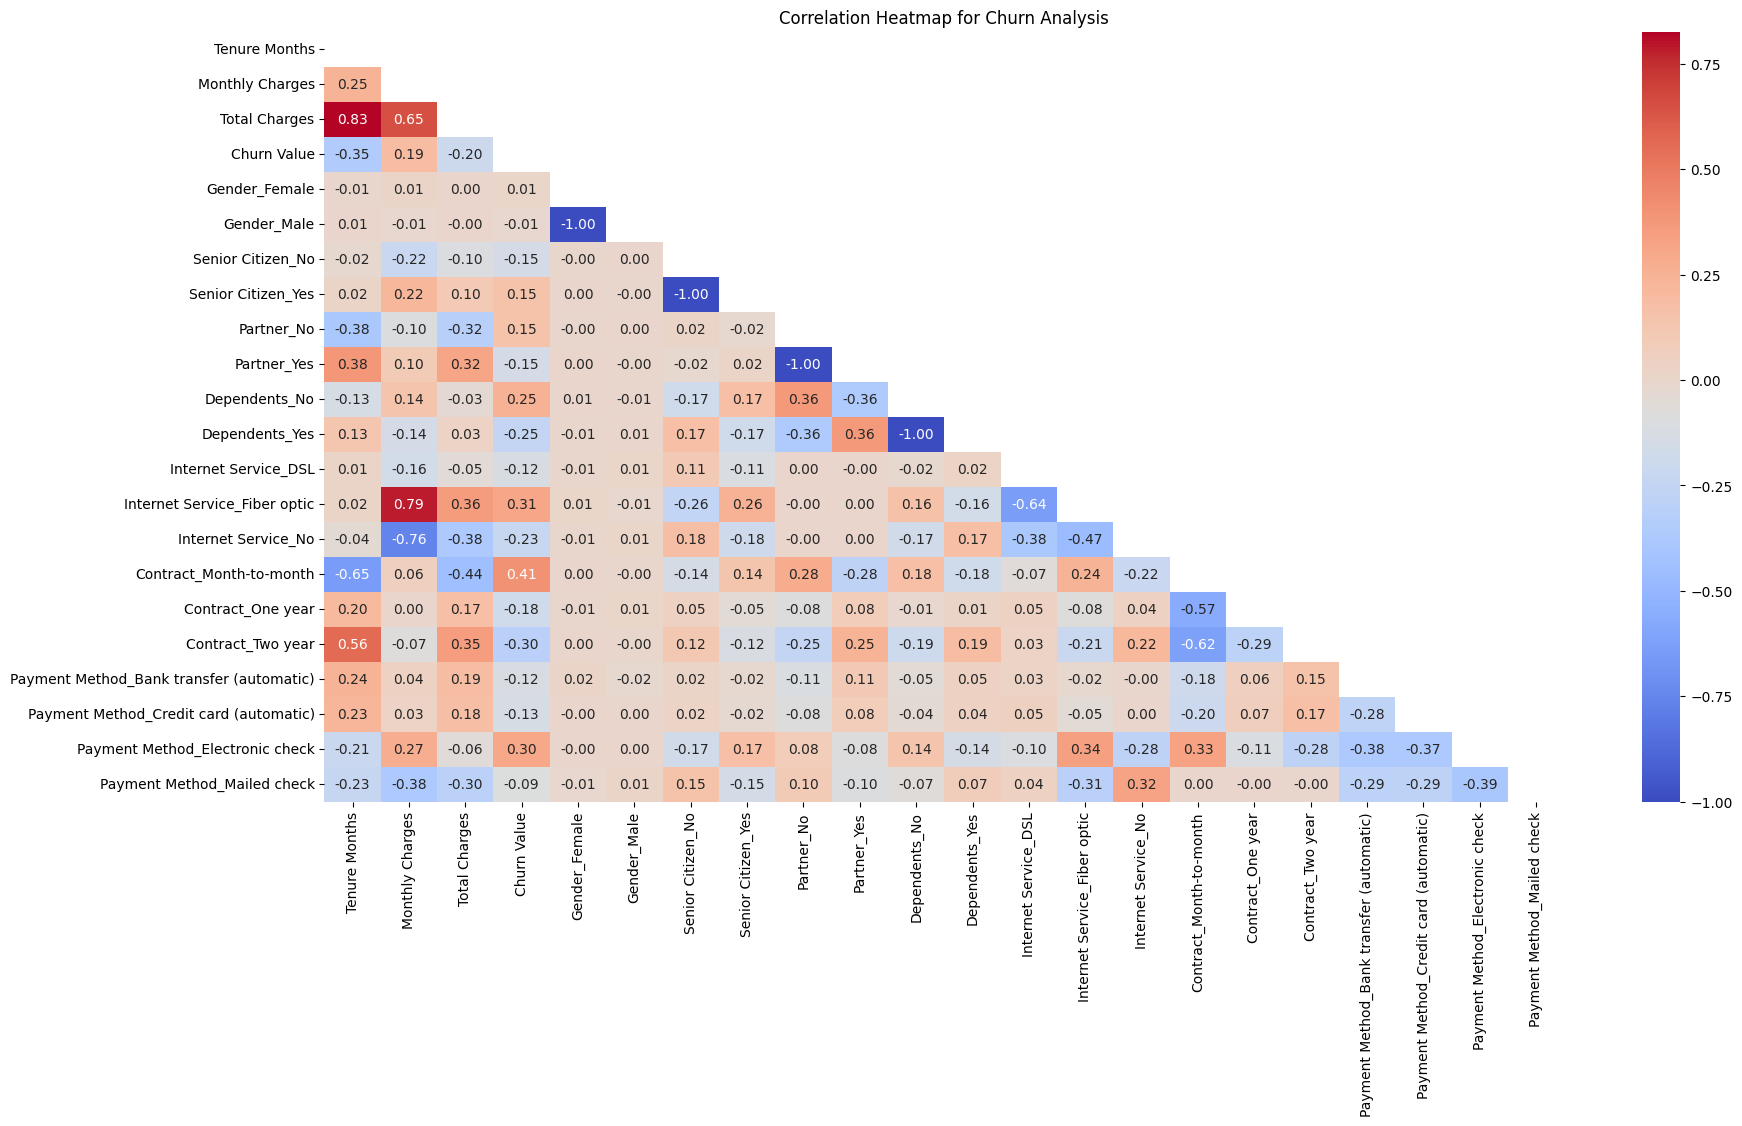

In [ ]:
# One-hot encoding for categorical variables (Transformation into numerical form through the creation of dummy variables)
categorical_vars = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Internet Service', 'Contract', 'Payment Method']
data_encoded = pd.get_dummies(df, columns=categorical_vars)

# Selecting key variables for correlation
key_vars = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value']

for col in data_encoded.columns:
    if col.startswith(tuple(categorical_vars)):
        key_vars.append(col)

# Creating a new DataFrame with just these key variables
extended_data = data_encoded[key_vars]

# Correlation matrix
extended_correlation_matrix = extended_data.corr()

# Mask
mask = np.triu(np.ones_like(extended_correlation_matrix, dtype=bool))

# Creating the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(extended_correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap for Churn Analysis')
plt.show()

Our analysis focused on identifying the correlation between the variables and the churn value. These are our main conclusions:

*   **Tenure:** There is a high negative correlation between tenure and churn which suggests that longer-term customers are less likely to churn.
*   **Contract Type:** Contract type, especially month-to-monthshows a significant positive correlation with churn. However, two-year contracts are less likely to churn.
*   **Internet Service Type:** Customers with fiber optic services might show higher churn rates.
*   **Payment Method:** Different payment methods (e.g., electronic check, mailed check, bank transfer, credit card) could show different correlations with churn. Electronic checks show a high correlation with churn.
*  **Partners and Dependents:** Having partners or dependents often correlates negatively with churn, suggesting that customers with family plans or joint services are more stable.

##5.7 Survival Analysis of Customers

**Time Spent Before Service Cancellation**

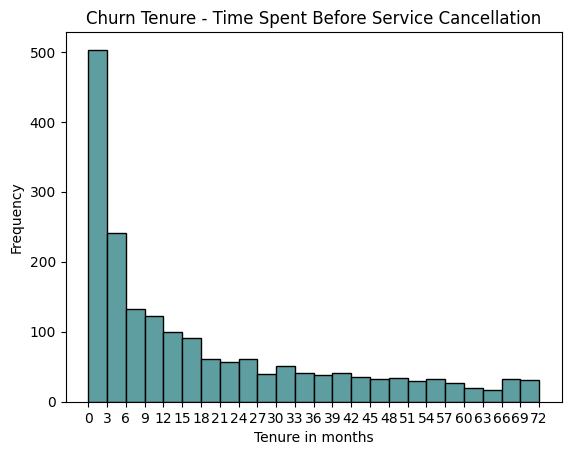

In [ ]:
# Filtering only the rows where 'Churn Label' is 'Yes' (customers who have churned)
Histo = df[df['Churn Label']=='Yes']

# Creating bins for the histogram. Bins start at 0 end before 75, with a width of 3 months
bins1 = np.arange(0, 75, 3)

# Creating a histogram for the 'Tenure Months'of clients who churned their service.
plt.hist(Histo['Tenure Months'], bins=bins1,edgecolor='black',color='#5f9ea0')

# Specify the locations and labels of the tick marks on the x-axis
plt.xticks(bins1)

# Setting the title and labels
plt.title('Churn Tenure - Time Spent Before Service Cancellation')
plt.xlabel('Tenure in months')
plt.ylabel('Frequency')
plt.show()

The 'Churn Tenure - Time Spent Before Service Cancellation' graph shows the time customers spent before canceling their service. As per the data, 0-3 months is the most frequent time range customers spent before canceling their service.

**Kaplan-Meier Survival Curve: Estimating Customer Retention**

The Kaplan-Meier survival curve depicted in the graph offers a quantitative visualization of customer retention over time as related to churn. This analysis enables us to observe the probability that a customer will remain with the company after a given tenure, measured in months.

Originally used in medical studies to track patient survival times, the Kaplan-Meier estimator is now used in business to predict how long customers stay with a company.

For this analysis, we use the variables: “Tenure Months” and “Churn Value”, including the "lifelines" library in Python.

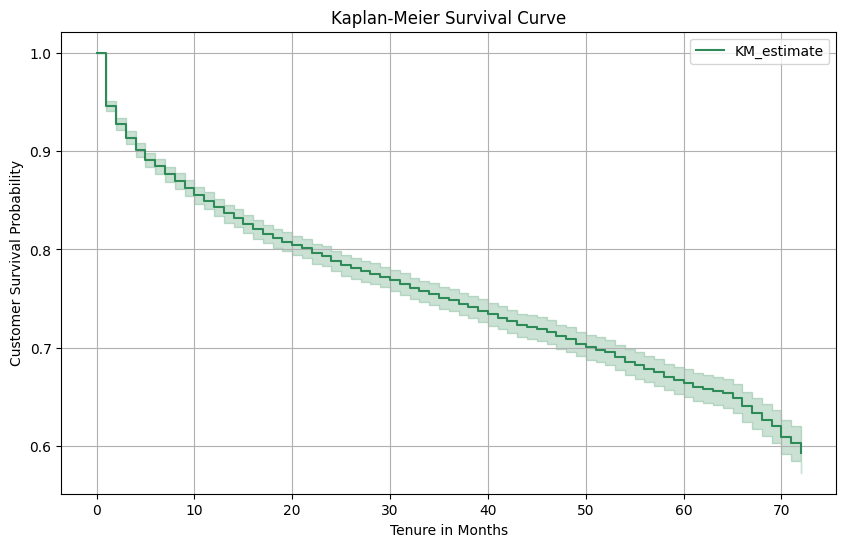

In [ ]:
!pip install lifelines --quiet
from lifelines import KaplanMeierFitter

# Instantiate the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Fit the model on the data
# 'Tenure in Months' as the duration and 'Churn Value' as the event observed
kmf.fit(durations=df['Tenure Months'], event_observed=df['Churn Value'])

# Plot the Kaplan-Meier Survival Curve
plt.figure(figsize=(10, 6))
kmf.plot_survival_function(color='seagreen')
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Tenure in Months')
plt.ylabel('Customer Survival Probability')
plt.grid(True)
plt.show()

The Kaplan-Meier curve shows that customers are more likely to leave the service soon after they sign up, as seen in the earlier "Time Spent Before Service Cancellation" graph. As time progresses, the rate of decline in survival probability appears to slow down, indicating that customers staying longer are less likely to churn.

# **6. Machine Learning Model**

## **6.1 Logistic Regression**

Logistic Regression is a statistical model commonly used in binary classification tasks, where the goal is to predict a binary outcome, in this case churn and no Churn.

**Importing necessary libraries:**

In [ ]:
#Installation of the imbalanced-learn package:
#Importing necessary libraries:

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

**Prepare the data**

In [ ]:
# Preparation of features and target variable:
#'extended_data' is already prepared and includes all necessary preprocessing and dummy variables

X = extended_data.drop('Churn Value', axis=1)  # Features
y = extended_data['Churn Value']              # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Handle Class Imbalance with SMOTE**

In [ ]:
print(df['Churn Value'].value_counts())

Churn Value
0    5174
1    1869
Name: count, dtype: int64


The distribution of the Churn Value in the dataset shows that approximately 73.46% of the customers did not churn (Churn Value = 0) and 26.54% did churn (Churn Value = 1). This indicates a class imbalance, where the majority class (non-churn) significantly outweighs the minority class (churn).

This imbalance is substantial enough to potentially bias a predictive model towards predicting the majority class. To address this, SMOTE technique are necessary to balance the class distribution.

In [ ]:
# Handling class imbalance using SMOTE:

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
print(y_train_resampled.value_counts())

Churn Value
0    4165
1    4165
Name: count, dtype: int64


**Create and Train the Logistic Regression Model**

In [ ]:
# Instantiate and train a logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate the model
y_pred = model.predict(X_test)


y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates needed for ROC AUC

**Evaluate performance**

In [ ]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7906316536550745
ROC AUC Score: 0.844399157581764
Precision: 0.6296296296296297
Recall: 0.6375


Given the accuracy of approximately 79.06%, the model performs reasonably in predicting customer churn. The ROC AUC score is high, indicating good discriminative ability. However, both precision and recall suggest opportunities for improvement. Precision at 62.96% and recall at 63.75% imply that while the model is fairly reliable in its predictions, it occasionally misses actual churners and also incorrectly labels non-churners as churners. The model might still benefit from further tuning and analysis.

## **6.2 XGBoost**

**Importing necessary libraries:**

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

**Solve Class Imbalance**

In [ ]:

# Instantiate BorderlineSMOTE
borderline_smote = BorderlineSMOTE(random_state=42, kind = 'borderline-2')

# Print shapes before applying BorderlineSMOTE
print("Shapes before BorderlineSMOTE:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Apply BorderlineSMOTE only on the training data
X_train_balanced, y_train_balanced = borderline_smote.fit_resample(X_train, y_train)

# Print shapes after applying BorderlineSMOTE
print("\nShapes after BorderlineSMOTE:")
print(f"X_train_balanced shape: {X_train_balanced.shape}")
print(f"y_train_balanced shape: {y_train_balanced.shape}")

Shapes before BorderlineSMOTE:
X_train shape: (5634, 21)
y_train shape: (5634,)

Shapes after BorderlineSMOTE:
X_train_balanced shape: (8330, 21)
y_train_balanced shape: (8330,)


In [ ]:
X_train.head()

,Tenure Months,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
2142,71,98.65,6962.85,False,True,True,False,False,True,True,...,False,True,False,False,True,False,False,True,False,False
1623,16,93.20,1573.70,True,False,True,False,True,False,True,...,False,True,False,True,False,False,False,True,False,False
6074,32,104.05,3416.85,True,False,True,False,True,False,True,...,False,True,False,False,True,False,False,True,False,False
1362,24,40.65,933.30,True,False,False,True,False,True,True,...,True,False,False,True,False,False,False,True,False,False
6754,20,20.05,406.05,True,False,True,False,False,True,False,...,False,False,True,True,False,False,False,False,False,True


**Model training and evaluation**

In [ ]:
# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.001, 0.01, 0.1, 0.2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='roc_auc')

# Fit the model
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict on the test set
y_pred = best_estimator.predict(X_test)
y_prob = best_estimator.predict_proba(X_test)[:, 1]

**Evaluate performance**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.80
ROC AUC: 0.86
Precision: 0.65
Recall: 0.63


The model achieves an accuracy of 80%, indicating that 80% of the predictions made by the model are correct. ROC AUC (Receiver Operating Characteristic Area Under Curve) score is 0.86. This metric measures the model's ability to distinguish between positive and negative classes. A higher ROC AUC score suggests better discrimination between the classes. However, the precision and recall scores suggest that there might be room for improvement, especially in correctly identifying positive instances while minimizing false positives. Further analysis and potentially model refinement could be beneficial to enhance the overall performance.

# **7. Dashboard**

Link to the Churn Analysis Dashboard: [Customer-ChurnAnalysis-For-Telecom-Company](https://lookerstudio.google.com/s/mxEk46iLiCo)



In [99]:
from IPython.display import IFrame

embed_url = 'https://lookerstudio.google.com/embed/reporting/f51118a7-c212-4f57-99fd-1253f4278255/page/HhxxD'

# Set the width and height for the iframe as needed
IFrame(embed_url, width=1300, height=1000)

#**8. Conclusion**

In our customer churn analysis for a telecom company, we examined various aspects of customer behavior and service uptake to understand and address the factors leading to customer churn. Our approach included detailed analysis across service subscriptions, contract types, charge distributions, geographical churn patterns, and advanced predictive modeling. Here are the key conclusions and strategic recommendations derived from our analysis:


*   Tenure and Churn: New customers, especially those within their first three months of service, are most likely to leave.
*   Service Subscription and Churn: Customers subscribing to tech support and online security services showed lower churn rates, highlighting the importance of value-added services in retention strategies. Conversely, those without these services displayed higher dissatisfaction and churn, suggesting a potential area for service enhancement.
*   Contract Type and Customer Loyalty: The analysis underscored the volatility of month-to-month contracts, with these customers showing the highest churn rates. In contrast, customers with longer-term contracts exhibited greater loyalty.
*   Geographical Insights: Cities like Los Angeles and San Diego showed notably higher churn rates, pointing to the need for region-specific customer engagement and retention programs.

Some of the retention strategies we suggest include:

*   Enhance Customer Support: Invest in improving the quality of customer service to address the critical issue of churn due to service dissatisfaction.
*   Employee Training and Engagement: Create and promote a positive employee culture through enhanced training and engagement initiatives to reduce factors related to employee attitude, which significantly impacts customer satisfaction and churn.
*   Competitive Offerings: Continuously evaluate and adjust our pricing and service offerings to remain competitive in the market. This will help retain price-sensitive customers who might otherwise be tempted by more appealing offers from competitors.
*   City Targeted Campaigns: Deploy targeted retention campaigns in high-churn cities to specifically address local issues and demographics, minimizing churn and enhancing customer loyalty in these critical markets.
*   Develop Targeted Marketing Strategies: Implement targeted marketing strategies that address specific churn, especially with new customers in the first three months, as they are the most vulnerable to churn.
*   Reassessing Contract Structures: Reevaluating the structure of month-to-month contracts to include benefits that encourage longer-term commitments could decrease churn rates. Offering incentives for switching to annual or bi-annual contracts may also reduce the propensity to churn.

Finally, we are employing machine learning models to further refine our retention strategies to predict potential churn. These models utilize historical data to identify at-risk customers before signs of dissatisfaction become apparent, allowing for proactive engagement.

#**9. References**

https://stackoverflow.com/

https://www.geeksforgeeks.org/

https://community.plotly.com/

https://tutorpython.com/

[Dataset Used](https://accelerator.ca.analytics.ibm.com/bi/?perspective=authoring&pathRef=.public_folders%2FIBM%2BAccelerator%2BCatalog%2FContent%2FDAT00148&id=i9710CF25EF75468D95FFFC7D57D45204&objRef=i9710CF25EF75468D95FFFC7D57D45204&action=run&format=HTML&cmPropStr=%7B%22id%22%3A%22i9710CF25EF75468D95FFFC7D57D45204%22%2C%22type%22%3A%22reportView%22%2C%22defaultName%22%3A%22DAT00148%22%2C%22permissions%22%3A%5B%22execute%22%2C%22read%22%2C%22traverse%22%5D%7D)

https://medium.com/@zachary.james.angell/applying-survival-analysis-to-customer-churn-40b5a809b05a

https://lookerstudio.google.com/navigation/reporting

#**10. Challenges**

One of the first difficulties we faced was data integration. Integrating diverse data sources such as demographics and services proved complex. We had to ensure that Customer IDs were consistent across different datasets and resolve any mismatches or duplications. To tackle this, we utilized robust data cleaning techniques and ensured that merge keys were consistent before combining datasets, ensuring that the resulting integrated data set was accurate and ready for analysis.

Another major challenge was handling missing and incomplete Data. We often found missing or incomplete entries in our dataset, including critical information like "Churn Reason" or "Total Charges." This incomplete data could potentially skew our analysis results if not addressed properly. To maintain the integrity of our analysis, we impute missing data appropriately, such as filling in "Churn Reasons" for non-churned customers and calculating or estimating "Total Charges."

Lastly, we included machine learning models in our project, which required an understanding of statistical methods. We invested significant time in understanding the nuances of model parameters and evaluating their performance.


#**11. Generative AI Disclosure**

*   Generative AI was utilized to add percentage symbols above the bar graphs and provided references for labeling the x-axis.
*   It helped us identify errors and understand various coding concepts.
*   We used it to clarify the management of Class Imbalance with SMOTE in the Machine Learning section.
*   It was employed to demonstrate how to apply a mask in the heatmap correlation.
*   It provided examples and insights on how to create dummy variables.
* It was used to align the labels to the center on certain graphs.










